In [ ]:
# 코드 설명
# 데이터 생성

# 랜덤한 수익률 데이터를 생성하고, 특정 구간에서 변동성 클러스터링(Volatility Clustering)을 추가하여 ARCH/GARCH 모형 적합이 유용하도록 만듦.
# ARCH 모형 적합

# arch_model 함수로 ARCH(1) 모형을 적합합니다.
# vol="ARCH"로 조건부 분산을 ARCH 형태로 설정.
# GARCH 모형 적합

# arch_model 함수로 GARCH(1,1) 모형을 적합합니다.
# vol="Garch"로 조건부 분산을 GARCH 형태로 설정.
# 결과 요약

# 각 모형의 결과를 출력하여 주요 통계량과 모수 값을 확인합니다.
# 조건부 분산 시각화

# ARCH와 GARCH 모형으로 추정된 조건부 변동성을 시각적으로 비교합니다.


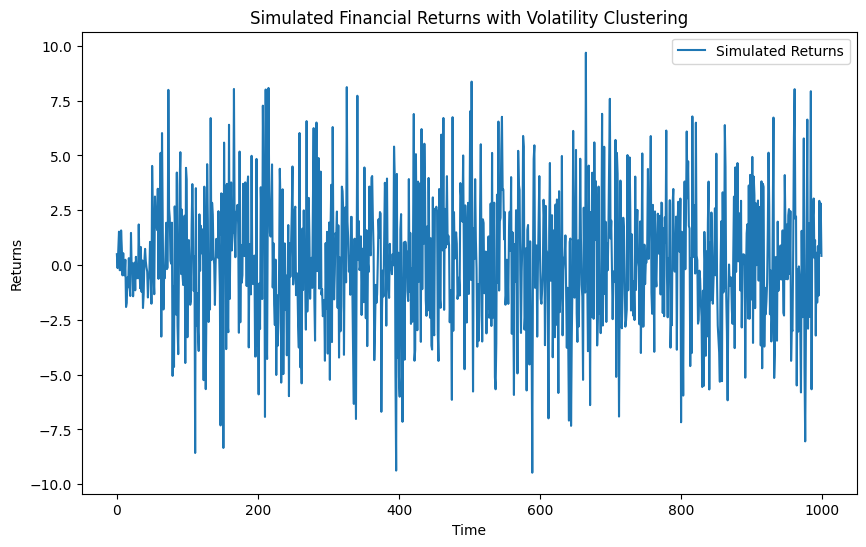

ARCH(1) Model Results:

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2529.06
Distribution:                  Normal   AIC:                           5064.12
Method:            Maximum Likelihood   BIC:                           5078.84
                                        No. Observations:                 1000
Date:                Tue, Dec 03 2024   Df Residuals:                      999
Time:                        13:39:48   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2120  9.585e-02      2.

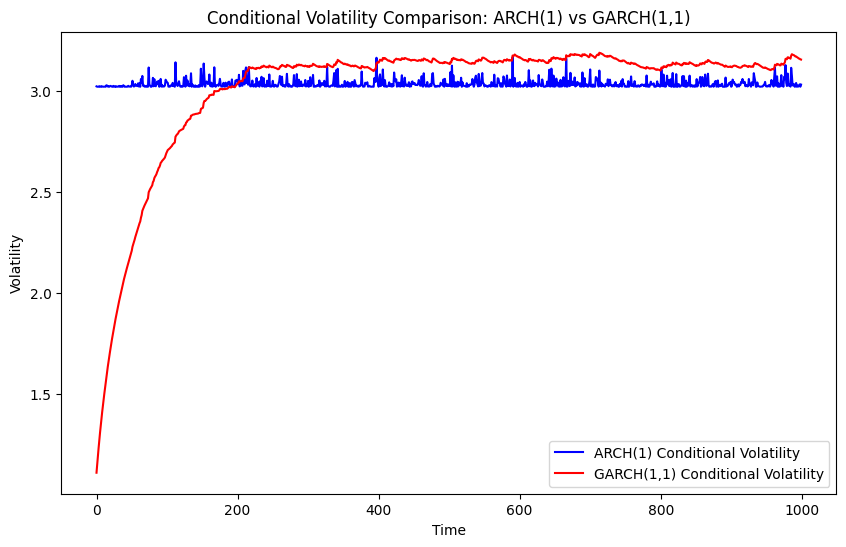

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# 1. 데이터 생성 (랜덤 금융 수익률 시뮬레이션)
np.random.seed(42)
n = 1000
returns = np.random.normal(0, 1, n)  # 정규분포에서 수익률 생성
for i in range(1, n):
    if i % 50 == 0:  # 변동성 클러스터링 추가
        returns[i:i+50] += np.random.normal(0, 3, 50)

# pandas DataFrame으로 변환
returns_df = pd.DataFrame(returns, columns=["returns"])

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(returns_df, label="Simulated Returns")
plt.title("Simulated Financial Returns with Volatility Clustering")
plt.xlabel("Time")
plt.ylabel("Returns")
plt.legend()
plt.show()

# 2. ARCH 모형 적합
arch_model_instance = arch_model(returns_df["returns"], vol="ARCH", p=1)  # ARCH(1) 모델
arch_results = arch_model_instance.fit(disp="off")  # 모형 적합
print("ARCH(1) Model Results:\n")
print(arch_results.summary())

# 3. GARCH 모형 적합
garch_model_instance = arch_model(returns_df["returns"], vol="Garch", p=1, q=1)  # GARCH(1,1) 모델
garch_results = garch_model_instance.fit(disp="off")  # 모형 적합
print("\nGARCH(1,1) Model Results:\n")
print(garch_results.summary())

# 4. 조건부 분산 시각화 (ARCH와 GARCH 비교)
plt.figure(figsize=(10, 6))
plt.plot(arch_results.conditional_volatility, label="ARCH(1) Conditional Volatility", color="blue")
plt.plot(garch_results.conditional_volatility, label="GARCH(1,1) Conditional Volatility", color="red")
plt.title("Conditional Volatility Comparison: ARCH(1) vs GARCH(1,1)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()


1. ARCH 모형 결과 해석
ARCH 모형은 과거 오차(잔차) 제곱값에 기반해 현재 시점의 변동성을 추정합니다.

결과 요약
ARCH(1) 모형 적합 결과에서 다음과 같은 값을 확인할 수 있습니다:

모수(Parameter):𝛼0 : 기본적인 분산 수준(상수항).
𝛼1 : 과거 오차 항(𝜖𝑡−12 )이 현재 변동성에 미치는 영향.
해석
𝛼0>0 : 조건부 분산이 항상 양수임을 보장.
𝛼1>0: 과거 충격(오차 제곱)이 현재 변동성에 미치는 정도.
𝛼1 이 클수록 변동성 클러스터링이 강하게 나타남.

2. GARCH 모형 결과 해석

GARCH 모형은 과거 오차와 조건부 분산 모두를 고려해 현재 변동성을 추정합니다.

GARCH는 ARCH보다 더 부드럽고 현실적인 변동성을 모델링할 수 있습니다.

결과 요약
GARCH(1,1) 모형 적합 결과에서 다음 값을 확인할 수 있습니다:
모수(Parameter):𝛼0 : 기본적인 분산 수준.
𝛼1 : 과거 오차 항(𝜖𝑡−12 )의 영향.
𝛽1 : 과거 조건부 분산(𝜎𝑡−12 )이 현재 변동성에 미치는 영향.
해석
𝛼0>0: 조건부 분산이 항상 양수임을 보장.
𝛼1 >0: 과거 오차 항이 현재 변동성에 미치는 영향.
𝛽1>0: 과거 조건부 분산이 현재 변동성에 미치는 영향.
𝛼1+𝛽1≈1:두 값의 합이 1에 가까울수록 변동성의 지속성이 높아짐
금융 데이터에서 이는 변동성이 한 번 발생하면 오랜 기간 유지됨을 의미(변동성 클러스터링).


3. 조건부 변동성 그래프 해석

ARCH와 GARCH 모델의 조건부 변동성(Conditional Volatility)을 비교하면, 다음과 같은 차이를 관찰할 수 있습니다:

ARCH 조건부 변동성:

변동성이 단기적으로 반응.
분산이 급격히 변화하는 경향(보다 날카로운 변동성).
GARCH 조건부 변동성:

변동성이 부드럽게 변화.
과거 분산의 영향을 반영하여 변동성이 점진적으로 감소하거나 증가.
그래프에서 확인할 수 있는 내용:
변동성 클러스터링:
두 모델 모두 변동성 클러스터링(변동성이 높은 시기가 연속적으로 발생)을 잘 캡처.
GARCH의 장기적 메모리 효과:
GARCH는 ARCH보다 변동성이 느리게 사라지는 모습을 보임. 이는 금융 데이터에서 흔히 관찰되는 패턴.